# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable trends:
1. The first trend to note is that the closer you are to the equator the higher the temperature is, as a general rule.
2. The coorelation between being closer to the equator and higher humidity is weak, but exists.
3. There is practically no correlation between latitude and wind speed. So, we can deduce that wind speed should not change much due to being closer or further from the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
import config_from_pydata_env

weather_api_key = config_from_pydata_env.weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url for openweather api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# empty lists to hold query information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# loop through list of cities and request information
count = 0
set = 1
for city in cities:
    count = count + 1
    # using sleep here to not reach api limit
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
    continue
print("Data Retrieval Complete")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | auki
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | marsa matruh
Processing Record 8 of Set 1 | raga
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | salta
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | hun
Processing Record 13 of Set 1 | ootmarsum
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | gao
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | sorvag
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | coari
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 of Set 1 | san vicente
Pro

Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | madang
Processing Record 39 of Set 4 | dolores
Processing Record 40 of Set 4 | paamiut
Processing Record 41 of Set 4 | bonavista
Processing Record 42 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | tselinnoye
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | thira
City not found. Skipping...
Processing Record 47 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 48 of Set 4 | kondinskoye
Processing Record 49 of Set 4 | antofagasta
Processing Record 50 of Set 4 | ninh binh
Processing Record 1 of Set 5 | grindavik
Processing Record 2 of Set 5 | kuliyapitiya
Processing Record 3 of Set 5 | winchester
Processing Record 4 of Set 5 | governador valadares
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | kingaroy
Processing Record 8 of Set 5 | vestmanna

Processing Record 21 of Set 8 | husavik
Processing Record 22 of Set 8 | lucapa
Processing Record 23 of Set 8 | bima
Processing Record 24 of Set 8 | nalut
Processing Record 25 of Set 8 | cedar city
Processing Record 26 of Set 8 | krasnyy yar
Processing Record 27 of Set 8 | beringovskiy
Processing Record 28 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 29 of Set 8 | rincon
Processing Record 30 of Set 8 | leningradskiy
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | takoradi
Processing Record 33 of Set 8 | palauig
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | vilyuysk
Processing Record 36 of Set 8 | orange cove
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | muros
Processing Record 39 of Set 8 | jasper
Processing Record 40 of Set 8 | portmore
Processing Record 41 of Set 8 | sayansk
Processing Record 42 of Set 8 | ho
City not found. Skipping...
Processing Record 43 of Set 8 | camacha
Processing Record 

Processing Record 11 of Set 12 | duz
City not found. Skipping...
Processing Record 12 of Set 12 | samarai
Processing Record 13 of Set 12 | najran
Processing Record 14 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 15 of Set 12 | adre
Processing Record 16 of Set 12 | dingle
Processing Record 17 of Set 12 | roebourne
Processing Record 18 of Set 12 | namwala
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | pontes e lacerda
Processing Record 21 of Set 12 | tessalit
Processing Record 22 of Set 12 | vanavara
Processing Record 23 of Set 12 | oum hadjer
Processing Record 24 of Set 12 | huarmey
Processing Record 25 of Set 12 | timaru
Processing Record 26 of Set 12 | sur
Processing Record 27 of Set 12 | boende
Processing Record 28 of Set 12 | micheweni
Processing Record 29 of Set 12 | nizwa
Processing Record 30 of Set 12 | sumbe
Processing Record 31 of Set 12 | guarapari
Processing Record 32 of Set 12 | kulaman
Processing Record 33 of Set 12 | k

In [5]:
len(lat)

618

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# convert raw data to dataframe
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# drop cities that were skipped because they could not be found by the api
city_weather_df = city_weather_df.dropna(how="any")

In [7]:
# export the city data into a .csv file within a folder named output_data
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# display the dataframe
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,44.60,56.0,40.0,19.46,AR,1.603221e+09
1,auki,-8.77,160.70,77.81,83.0,100.0,5.55,SB,1.603222e+09
2,kaitangata,-46.28,169.85,50.00,83.0,100.0,1.99,NZ,1.603221e+09
3,tuktoyaktuk,69.45,-133.04,23.00,85.0,90.0,16.11,CA,1.603221e+09
4,punta arenas,-53.15,-70.92,48.20,45.0,75.0,14.99,CL,1.603221e+09
...,...,...,...,...,...,...,...,...,...
613,zubova polyana,54.08,42.84,37.53,89.0,90.0,11.43,RU,1.603222e+09
614,neyshabur,36.21,58.80,54.16,29.0,0.0,2.21,IR,1.603222e+09
615,teya,60.38,92.63,28.53,97.0,96.0,2.84,RU,1.603221e+09
616,pitkyaranta,61.57,31.48,33.39,90.0,8.0,7.96,RU,1.603222e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

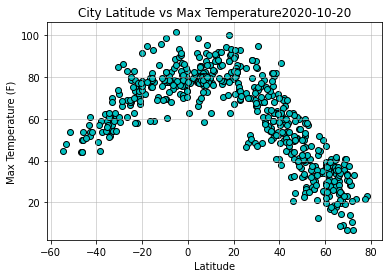

In [10]:
# set date time variable for title
date_time = datetime.date(datetime.now())

# create latitude vs temperature scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Max Temperature{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel("Max Temperature (F)")

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_temperature.png")

# show the scatterplot
plt.show()

The above scatterplot shows the relationship between latitude and max temperature of all the data gathered using OpenWeatherMaps API.

## Latitude vs. Humidity Plot

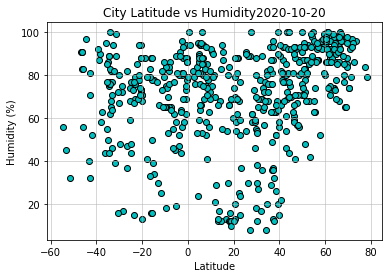

In [11]:
# create latitude vs humidity scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Humidity{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Humidity (%)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_humidity.png")

# show the scatterplot
plt.show()

The above scatterplot shows the relationship between latitude and humidity of all the data gathered using OpenWeatherMaps API.

## Latitude vs. Cloudiness Plot

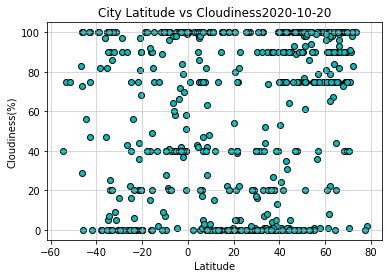

In [12]:
# create latitude vs cloudiness scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Cloudiness{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Cloudiness(%)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_cloudiness.png")

# show the scatterplot
plt.show()

The above scatterplot shows the relationship between latitude and cloudiness of all the data gathered using OpenWeatherMaps API.

## Latitude vs. Wind Speed Plot

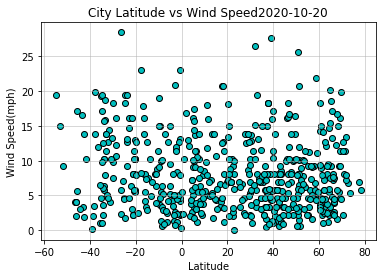

In [13]:
# create latitude vs wind speed scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Wind Speed{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Wind Speed(mph)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_wind_speed.png")

# show the scatterplot
plt.show()

The above scatterplot shows the relationship between latitude and wind speed of all the data gathered using OpenWeatherMaps API.

## Linear Regression

In [14]:
# northern and southern hemisphere dataframes
northern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] < 0]

# define linear regression and scatterplot function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# function for annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


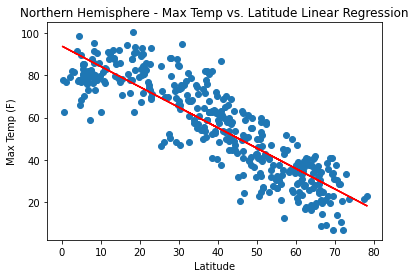

In [15]:
# use linear regression function for northern hempisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Max Temp (F)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_temp_lat_regression.png")

# show the plot
plt.show()

In the above scatterplot we can see the linear regression displays a strong negative coorelation between max temperature and latitude when in the Northern Hemisphere. You can see that as the latitude increases away from the equator(0 degrees latitude), the temperature decreases. So, here is our evidence that it is hotter the closer you are to the equator as a general rule.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.78


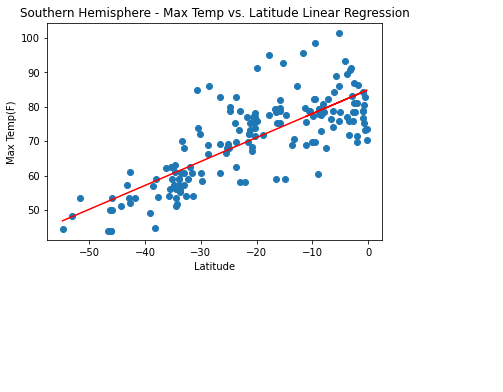

In [16]:
# use linear regression function for southern hempisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Max Temp(F)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_temp_lat_regression.png")

# show the plot
plt.show()

In the above scatterplot we can see the linear regression displays a strong positive coorelation between max temperature and latitude when in the Southern Hemisphere. You can see that as the latitude increases towards the equator(0 degrees latitude), the temperature also increases. So, here is our evidence that it is hotter the closer you are to the equator as a general rule.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35


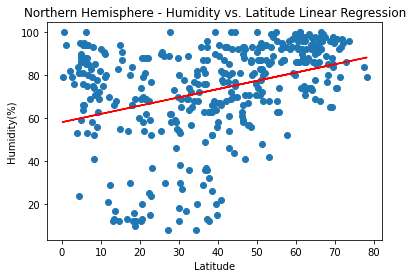

In [17]:
# use linear regression function for northern hemisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Humidity(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_humidity_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02


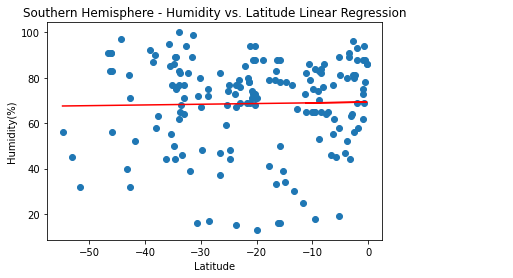

In [18]:
# use linear regression function for southern hemisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Humidity(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_humidity_lat_regression.png")

# show the plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


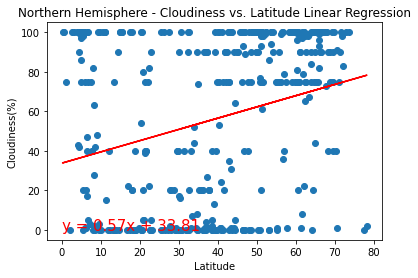

In [19]:
# use linear regression function for northern hemisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Cloudiness(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_cloudiness_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


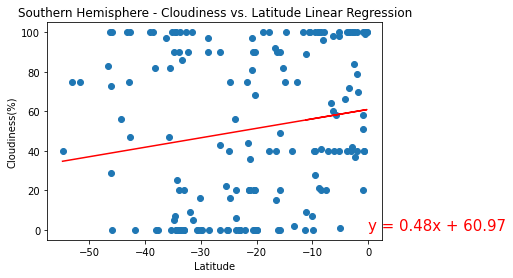

In [20]:
# use linear regression function for southern hemisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Cloudiness(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_cloudiness_lat_regression.png")

# show the plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.0


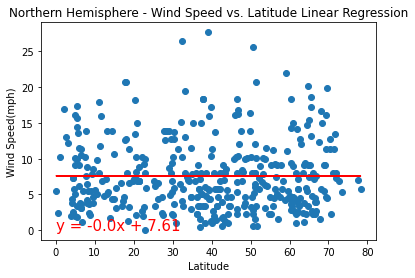

In [21]:
# use linear regression function for northern hemisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Wind Speed(mph)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_wind_speed_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.18


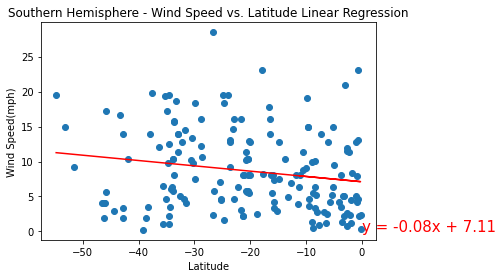

In [22]:
# use linear regression function for southern hemisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Wind Speed(mph)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_wind_speed_lat_regression.png")

# show the plot
plt.show()